In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import pdir as pr
import pandas as pd
import os
from tqdm import tqdm, tnrange, tqdm_notebook

DF = pd.DataFrame
arr = np.array

# 损失函数

In [23]:
def calcLoss(predict, label):
    '''计算预测值相对于标签值的损失值，默认使用均方误差'''
    def RMeanSquareError(a, b):
        '''计算均方误差'''
        return np.sqrt(np.mean((a - b)**2))
    
    return RMeanSquareError(predict, label)

# 测试集标签

In [24]:
testSetLabel = np.loadtxt("data\\test_label.csv")
testSetLabel.shape
testSetLabel[0:5]

(742,)

array([ 108.,   69.,   50.,   15.,    5.])

# 计算预测标签RMSE

In [25]:
def show_fig(test_range, predict, label):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10.5, 4)
    plt.plot(test_range, predict, 'r', label="prediction")
    plt.plot(test_range, label, 'g', label="data")
    ax.set_xlim(right=len(test_range))
    plt.xlabel('day')
    plt.ylabel('count of total rental bikes')
    plt.title("count of total rental bikes versus time")
    plt.legend(bbox_to_anchor=(0, -0.1), loc=2, borderaxespad=0., fontsize='small')
    plt.show()
    plt.close()

104.20109368201614

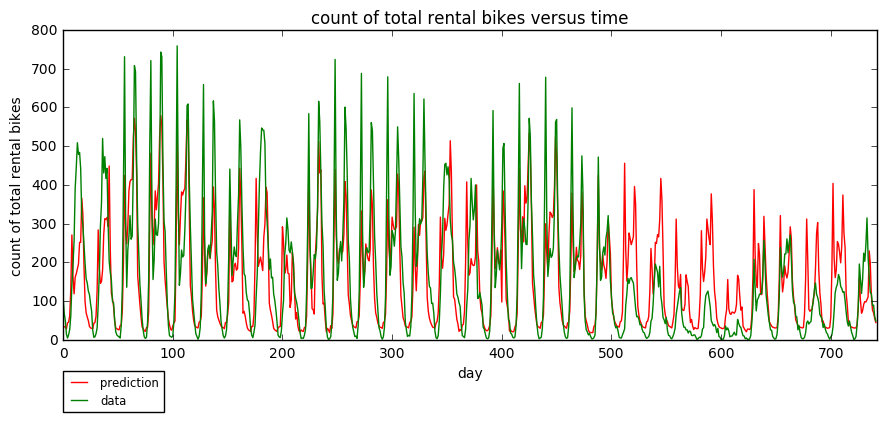

In [237]:
predictLabel = np.loadtxt("rank\\47_v1.csv")

# for i in range(1, int(predictLabel.shape[0]/24)+1):
#     j = (i-1)*24
#     max_index1 = np.argmax(predictLabel[j:j+24])
#     max1 = predictLabel[j+max_index1]
#     predictLabel[j+max_index1] = -1
    
#     max_index2 = np.argmax(predictLabel[j:j+24])
#     predictLabel[j+max_index2] *= 1.4
#     predictLabel[j+max_index1] = max1*1.1
    
    
calcLoss(predictLabel, testSetLabel) 
show_fig(np.arange(len(predictLabel)), predictLabel, testSetLabel)

149.29333988270653

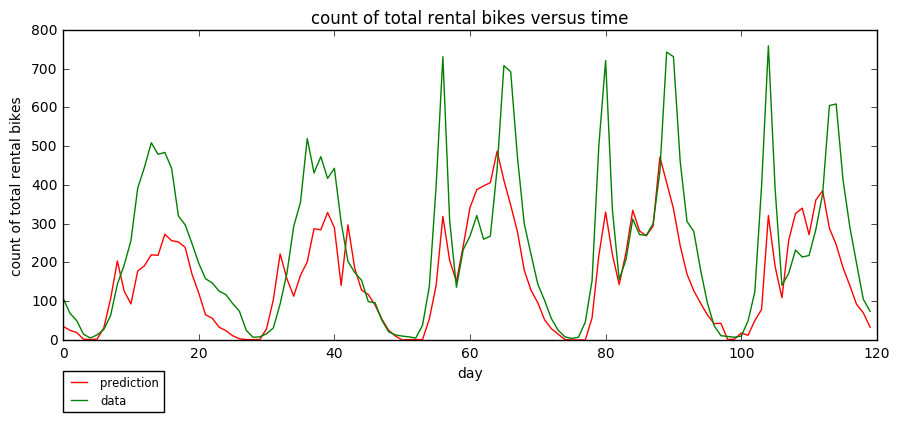

In [126]:
start = 0
stop = 24*5
test_range = np.arange(len(predictLabel))[start:stop]
predict = predictLabel[start:stop].copy()

for i in range(1, int(stop/24)+1):
    j = (i-1)*24
    predict[j+11:j+17] *= 1.4

actual = testSetLabel[start:stop]
calcLoss(predict, actual)
show_fig(test_range, predict, actual)

# 检查测试集小时的分布

发现缺失了两个小时的数据（对应小时3和小时4）。

In [48]:
test = pd.read_csv(".\\data\\test.csv")
hr = test["hr"]
Counter(hr)

Counter({0: 31,
         1: 31,
         2: 31,
         3: 30,
         4: 30,
         5: 31,
         6: 31,
         7: 31,
         8: 31,
         9: 31,
         10: 31,
         11: 31,
         12: 31,
         13: 31,
         14: 31,
         15: 31,
         16: 31,
         17: 31,
         18: 31,
         19: 31,
         20: 31,
         21: 31,
         22: 31,
         23: 31})

# rank 记录

step2: 116.16953059333129

```py
learning_rate = 0.05
n_hidden = 18
SGD_batch_size = -1
runtime = 100
```

没有归一化cnt

step2:121.23285162309952

```py
learning_rate = 0.05
n_hidden = 30
SGD_batch_size = 256
runTime = 2500
```

没有归一化cnt

# WTF np.dot

测试一：3 * 2 矩阵与 2 个元素的行向量相乘：

In [27]:
a = arr([[1,2],
         [3,4],
         [5,6]])

b = arr([0,1])

a.shape
b.shape

(3, 2)

(2,)

得到的结果是 3 个元素的行向量

In [28]:
ab = np.dot(a, b)
ab
ab.shape

array([2, 4, 6])

(3,)

测试二：3 \* 2 矩阵与 2 \* 1 的矩阵相乘：

In [29]:
c = arr([[0],
         [1]])
c.shape

(2, 1)

得到的是 3 * 1 的矩阵。

In [30]:
ac = np.dot(a,c)
ac
ac.shape

array([[2],
       [4],
       [6]])

(3, 1)

测试三：2 个元素的行向量与 2 * 1 矩阵相乘

得到的是 一个元素的行向量

In [31]:
bc = np.dot(b,c)
b
c
bc
bc.shape

array([0, 1])

array([[0],
       [1]])

array([1])

(1,)

结论：当np的两个array相乘时，若其中有一个是行向量，则相乘的结果就是行向量。若两者都是矩阵，则相乘后的结果就是矩阵。

测试四：遍历 3 * 2 矩阵的每一行

得到的是 2 个元素的行向量

In [32]:
for i in a:
    print(i,i.shape)

[1 2] (2,)
[3 4] (2,)
[5 6] (2,)
